In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import libarchive

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
from sklearn.datasets import load_boston
df = load_boston()

In [ ]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(df.DESCR)

In [ ]:
boston = pd.DataFrame(df.data,columns=df.feature_names)
boston.head(10)

In [ ]:
boston['MEDV'] = df.target
boston.head()

In [ ]:
boston.isnull()

In [ ]:
boston.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV',axis=1)
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.15,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Fitting model on the training detaset

lin_model = LinearRegression()

lin_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from numpy.core.fromnumeric import mean
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

#on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("the model performance for testing set")
print('RNSE is {}'.format(rmse))

The model performance for training set
RMSE is 4.710901797319796


the model performance for testing set
RNSE is 4.687543527902972


Text(0, 0.5, 'predicted')

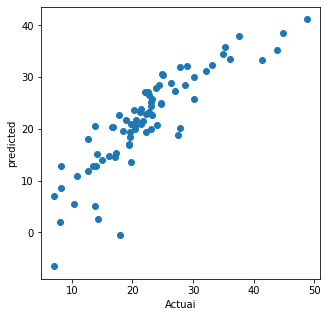

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_test_predict)
#plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict)])

plt.xlabel('Actuai')
plt.ylabel('predicted')